# Does the linear regression make sense?

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions as f
import random

In [33]:
import scipy.stats as st

def get_pvalue(count, permut):
    # calculating p-value without first and last group, since std is 0 here. 
    z_score = (np.array(count['matches'][1:-1])-np.array(permut['mean'][1:-1]))/np.array(permut['std'][1:-1])


    #cumulative distribution function
    # --> not sure if I should take 1- ? for righttailed test? yes. or just use sf.
    p_values = st.norm.sf(z_score)


    # significance 5%
    top = st.norm.ppf(.975)
    bottom = st.norm.ppf(.025)
    
    return (p_values, z_score)

# Permutations

In [3]:
# import permutation scores
percentages = list(np.arange(0, 1.02, 0.02))

In [34]:
# import results from pca model
pca_permut160 = pd.read_pickle('pca/permutations.pkl')

pca_count160 = pd.DataFrame(pd.read_pickle('pca/count.pkl'), columns = ['matches'])
pca_permut160['percentages'], pca_count160['percentages']=percentages, percentages

pca_p_values, pca_z_scores = get_pvalue(count = pca_count160, permut = pca_permut160)

In [35]:
# import results from pls model
pls_permut160 = pd.read_pickle('pls/permutations.pkl')

pls_count160 = pd.DataFrame(pd.read_pickle('pls/count.pkl'), columns = ['matches'])
pls_permut160['percentages'], pls_count160['percentages']=percentages, percentages

pls_p_values, pls_z_scores = get_pvalue(count = pls_count160, permut = pls_permut160)

In [36]:
# import results from linear model
linear_permut160 = pd.read_pickle('linearQuick/permutations.pkl')

linear_count160 = pd.DataFrame(pd.read_pickle('linearQuick/count.pkl'), columns = ['matches'])
linear_permut160['percentages'], linear_count160['percentages']=percentages, percentages

linear_p_values, linear_z_scores = get_pvalue(count = linear_count160, permut = linear_permut160)

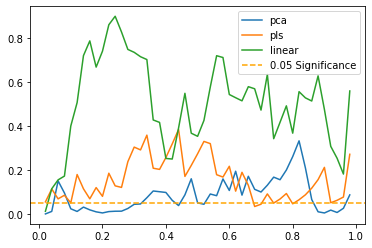

In [42]:
ax = sns.lineplot(x = percentages[1:-1], y = pca_p_values, label = 'pca')
sns.lineplot(x = percentages[1:-1], y = pls_p_values, label = 'pls')
sns.lineplot(x = percentages[1:-1], y = linear_p_values, label = 'linear')
ax.axhline(0.05, ls = '--', c='orange', label = '0.05 Significance')
ax.legend()

Text(0.5, 1.0, 'Number of matches with increasing coefficient values')

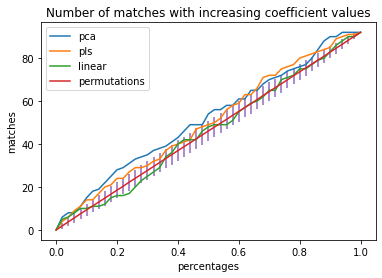

In [62]:
ax = sns.lineplot(data = pca_count160, x='percentages', y = 'matches',label='pca')
ax = sns.lineplot(data = pls_count160, x='percentages', y = 'matches',label='pls')
ax = sns.lineplot(data = linear_count160, x='percentages', y = 'matches',label='linear')
ax = sns.lineplot(data = pca_permut160, x ='percentages', y = 'mean', label='permutations')
ax.errorbar(pca_permut160['percentages'], pca_permut160['mean'], yerr=pca_permut160['std'], fmt=' ', zorder=-1)
ax.legend()
ax.set_title('Number of matches with increasing coefficient values')


Text(0.5, 1.0, 'PCA Regression')

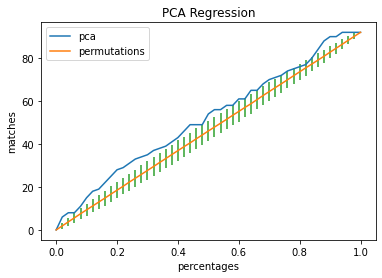

In [64]:
ax = sns.lineplot(data = pca_count160, x='percentages', y = 'matches',label='pca')
ax = sns.lineplot(data = pca_permut160, x ='percentages', y = 'mean', label='permutations')
ax.errorbar(pca_permut160['percentages'], pca_permut160['mean'], yerr=pca_permut160['std'], fmt=' ', zorder=-1)
ax.legend()
ax.set_title('PCA Regression')

Text(0.5, 1.0, 'PLS Regression')

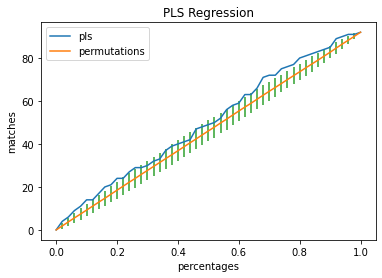

In [65]:
ax = sns.lineplot(data = pls_count160, x='percentages', y = 'matches',label='pls')
ax = sns.lineplot(data = pls_permut160, x ='percentages', y = 'mean', label='permutations')
ax.errorbar(pls_permut160['percentages'], pls_permut160['mean'], yerr=pls_permut160['std'], fmt=' ', zorder=-1)
ax.legend()
ax.set_title('PLS Regression')

Text(0.5, 1.0, 'Linear Regression')

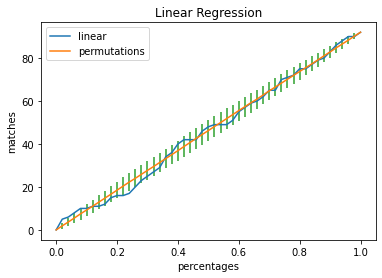

In [66]:
ax = sns.lineplot(data = linear_count160, x='percentages', y = 'matches',label='linear')
ax = sns.lineplot(data = linear_permut160, x ='percentages', y = 'mean', label='permutations')
ax.errorbar(linear_permut160['percentages'], linear_permut160['mean'], yerr=linear_permut160['std'], fmt=' ', zorder=-1)
ax.legend()
ax.set_title('Linear Regression')

#### There are 416 matches from the RegNet database for the 160 relevant genes, looking at predictors and targets. Of those, 91 are also represented in our set of 1109*152=167,459 pairs. 